In [1]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('logistic_regression_model.pkl', 'rb') as f:
    logistic_regression_model = pickle.load(f)

In [3]:
with open('tuned_xgboost_model.pkl', 'rb') as f:
    xgboost_tuned = pickle.load(f)

In [4]:
with open('svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

In [5]:
with open('best_knn_model.pkl', 'rb') as f:
    knn_model = pickle.load(f)

C:\Users\Nath\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.4.1.post1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
from sklearn.ensemble import VotingClassifier

In [7]:
classifiers = [('Logistic Regression', logistic_regression_model),
               ('XGBoost', xgboost_tuned),
               ('SVM', svm_model),
               ('KNN', knn_model)]

voting_classifier = VotingClassifier(estimators=classifiers, voting='hard')

In [8]:
df = pd.read_csv('./Complete-data.csv')

X = df.drop(columns=['Landslide'])
y = df['Landslide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
voting_classifier.fit(X_train, y_train)
predictions = voting_classifier.predict(X_test)

In [10]:
voting_predictions = voting_classifier.predict(X_test)

# Calculate metrics for the Voting Classifier
print("Voting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, voting_predictions))
print("MCC:", matthews_corrcoef(y_test, voting_predictions))
print("Classification Report:")
print(classification_report(y_test, voting_predictions))

Voting Classifier Metrics:
Accuracy: 0.7777777777777778
MCC: 0.5543857043727117
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       114
           1       0.80      0.78      0.79       129

    accuracy                           0.78       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.78      0.78      0.78       243



In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

voting_predictions = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, voting_predictions)
precision = precision_score(y_test, voting_predictions)
recall = recall_score(y_test, voting_predictions)
f1 = f1_score(y_test, voting_predictions)
mcc = matthews_corrcoef(y_test, voting_predictions)

print("Metrics for Voting Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC:", mcc)

Metrics for Voting Classifier:
Accuracy: 0.7777777777777778
Precision: 0.7952755905511811
Recall: 0.7829457364341085
F1 Score: 0.7890625
MCC: 0.5543857043727117


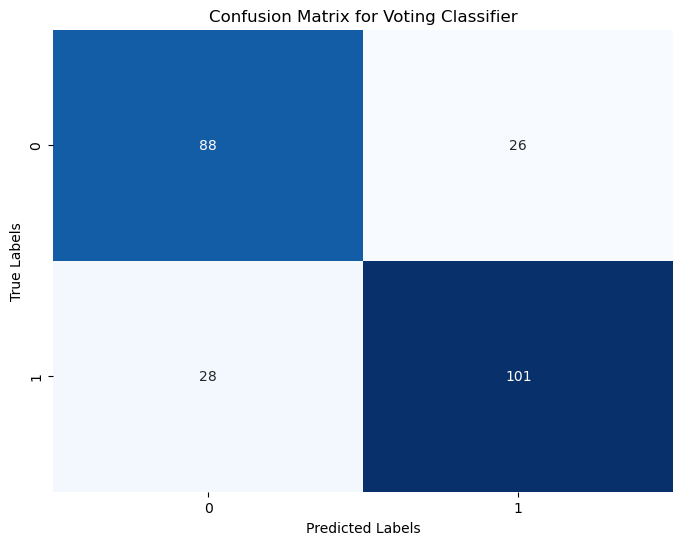

In [11]:
conf_matrix = confusion_matrix(y_test, voting_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Voting Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('VotingClassifierCM.png')
plt.show()

In [12]:
models = [logistic_regression_model, xgboost_tuned, svm_model, knn_model]
model_names = ['Logistic Regression', 'XGBoost', 'SVM', 'KNN']

for model, name in zip(models, model_names):
    model_predictions = model.predict(X_test)

    print(f"\nMetrics for {name}:")
    print("Accuracy:", accuracy_score(y_test, model_predictions))
    print("MCC:", matthews_corrcoef(y_test, model_predictions))
    print("Classification Report:")
    print(classification_report(y_test, model_predictions))


Metrics for Logistic Regression:
Accuracy: 0.7366255144032922
MCC: 0.4701064826392048
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       114
           1       0.74      0.78      0.76       129

    accuracy                           0.74       243
   macro avg       0.74      0.73      0.73       243
weighted avg       0.74      0.74      0.74       243


Metrics for XGBoost:
Accuracy: 0.8724279835390947
MCC: 0.7438634991663973
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       114
           1       0.87      0.90      0.88       129

    accuracy                           0.87       243
   macro avg       0.87      0.87      0.87       243
weighted avg       0.87      0.87      0.87       243


Metrics for SVM:
Accuracy: 0.7695473251028807
MCC: 0.5366193648990748
Classification Report:
              precision    recall  f1-score 

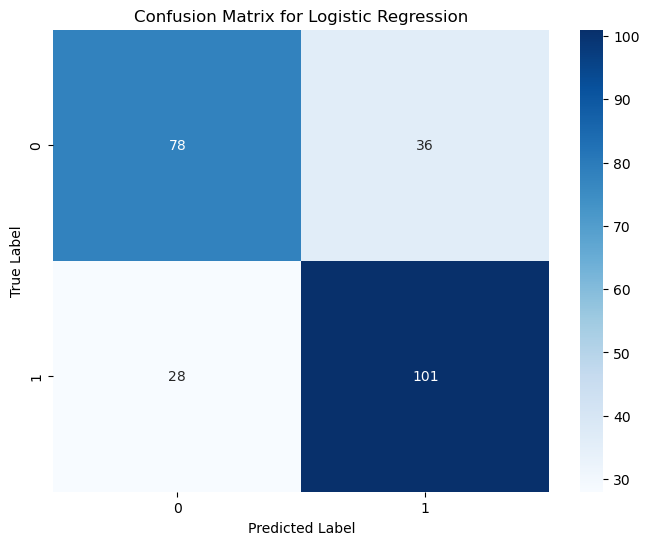

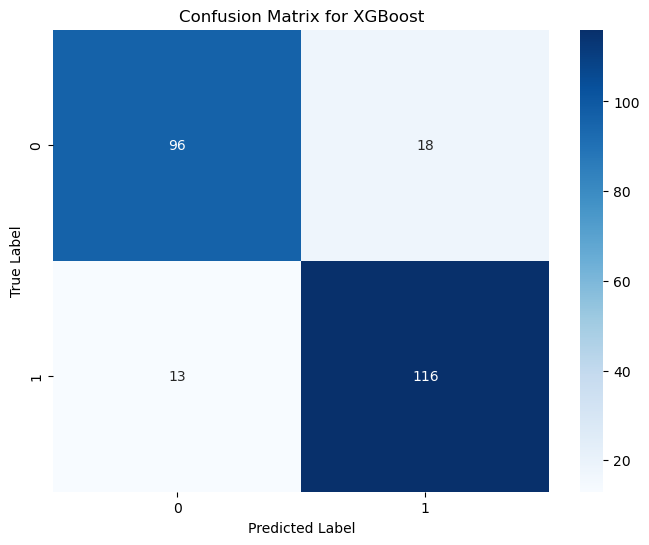

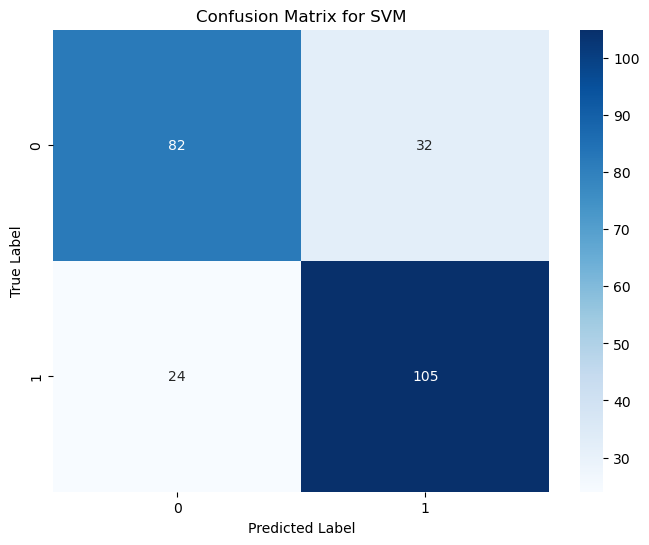

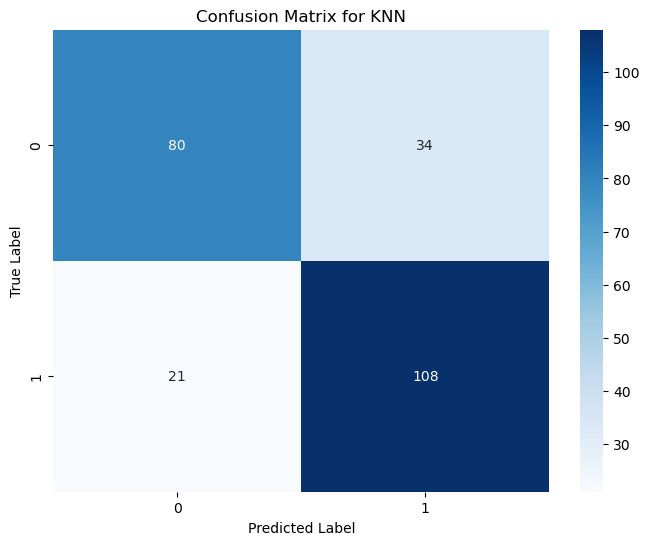

In [13]:
for model, name in zip(models, model_names):
    model_predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, model_predictions)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f"confusion_matrix_{name}.png")  # Save the confusion matrix plot
    plt.show()

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

models = [logistic_regression_model, xgboost_tuned, svm_model, knn_model]
model_names = ['Logistic Regression', 'XGBoost', 'SVM', 'KNN']

for model, name in zip(models, model_names):
    model_predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, model_predictions)
    precision = precision_score(y_test, model_predictions)
    recall = recall_score(y_test, model_predictions)
    f1 = f1_score(y_test, model_predictions)
    mcc = matthews_corrcoef(y_test, model_predictions)
    
    print(f"\nMetrics for {name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("MCC:", mcc)



Metrics for Logistic Regression:
Accuracy: 0.7366255144032922
Precision: 0.7372262773722628
Recall: 0.7829457364341085
F1 Score: 0.7593984962406014
MCC: 0.4701064826392048

Metrics for XGBoost:
Accuracy: 0.8724279835390947
Precision: 0.8656716417910447
Recall: 0.8992248062015504
F1 Score: 0.8821292775665398
MCC: 0.7438634991663973

Metrics for SVM:
Accuracy: 0.7695473251028807
Precision: 0.7664233576642335
Recall: 0.813953488372093
F1 Score: 0.7894736842105262
MCC: 0.5366193648990748

Metrics for KNN:
Accuracy: 0.7736625514403292
Precision: 0.7605633802816901
Recall: 0.8372093023255814
F1 Score: 0.7970479704797049
MCC: 0.5457602840478722
